# Final Test-set Evaluation

We found our best model to be the Gradient Boosting model. It had a a f1-accuracy score of 0.95 on the cross-validation set. The classification report showed that the model was 95% correct when predicting class 1 of the target variable, which was normal classification of fetal health, and 91% correct when predicting class 2, which was at-risk classification of fetal health. The confusion matrix also showed this, with 1290 true positives for class 1, 317 true positives for class 2, and a total of 93 incorrect classifications. 

The best hyperparameters we found for this model was a learning rate of 0.1, a max depth of 3, and a number of estimators of 200. 

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, recall_score, f1_score)

# Setting random seed for reproducibility
np.random.seed(42)

# Loading the data 
df_train = pd.read_csv("../Data/train_set.csv")
df_train.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,125.0,0.000,0.0,0.008,0.000,0.0,0.0,32.0,1.1,3.0,13.0,1.0
1,140.0,0.000,0.0,0.001,0.000,0.0,0.0,60.0,0.8,32.0,11.2,2.0
2,122.0,0.000,0.0,0.000,0.001,0.0,0.0,20.0,1.8,0.0,13.8,1.0
3,137.0,0.005,0.0,0.005,0.002,0.0,0.0,36.0,0.9,0.0,5.0,1.0
4,142.0,0.003,0.0,0.004,0.000,0.0,0.0,46.0,0.7,27.0,5.9,1.0


In [2]:
# Separating features and target variable
X_train = df_train.drop(columns=['fetal_health'])
y_train = df_train['fetal_health']

# Encoding the outcome variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
classes = label_encoder.classes_

# Verifying the encoding
print(f"\nEncoded classes: {classes}")
print(f"Encoded labels: {np.unique(y_train_encoded)}")


Encoded classes: [1. 2.]
Encoded labels: [0 1]


In [3]:
# Gradient boosting pipeline, with optimized hyperparameters included 
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(learning_rate=0.1,
    max_depth=3,n_estimators=200,random_state=42))
])

# Fitting and predicting on the training set
train_model = pipe.fit(X_train, y_train_encoded)
y_train_pred = train_model.predict(X_train)

# Calculating accuracy score 
print(f"Training set accuracy: {accuracy_score(y_train_encoded, y_train_pred).__round__(4)}")
print(f"Training set precision: {precision_score(y_train_encoded, y_train_pred, average='weighted').__round__(4)}")
print(f"Training set recall: {recall_score(y_train_encoded, y_train_pred, average='weighted').__round__(4)}")
print(f"Training set F1 score: {f1_score(y_train_encoded, y_train_pred, average='weighted').__round__(4)}")

Training set accuracy: 0.9853
Training set precision: 0.9854
Training set recall: 0.9853
Training set F1 score: 0.9852


In [4]:
# Confusion matrix
train_conf_matrix = confusion_matrix(y_train_encoded, y_train_pred)
print(f"Training set confusion matrix:\n{train_conf_matrix}")

Training set confusion matrix:
[[1319    3]
 [  22  356]]


Now that we have fit our best model to the entire training set, we can evaluate its performance on the test set. We will use the same hyperparameters and pipelines as above, just changing the data input that we use. Additionally, we will use the same metrics as above, and as our other models, to test the performance on the test set.

In [5]:
# Loading the data 
df_test = pd.read_csv("../Data/test_set.csv")

# Separating features and target variable
X_test = df_test.drop(columns=['fetal_health'])
y_test = df_test['fetal_health']

# Encoding the outcome variable
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
classes = label_encoder.classes_

# Verifying the encoding
print(f"\nEncoded classes: {classes}")
print(f"Encoded labels: {np.unique(y_test_encoded)}")


Encoded classes: [1. 2.]
Encoded labels: [0 1]


In [6]:
# Using Gradient Boosting pipeline from above 
# Fitting and predicting on the test set
test_model = pipe.fit(X_test, y_test_encoded)
y_test_pred = test_model.predict(X_test)

# Calculating accuracy score 
print(f"Test set accuracy: {accuracy_score(y_test_encoded, y_test_pred).__round__(4)}")
print(f"Test set precision: {precision_score(y_test_encoded, y_test_pred, average='weighted').__round__(4)}")
print(f"Test set recall: {recall_score(y_test_encoded, y_test_pred, average='weighted').__round__(4)}")
print(f"Test set F1 score: {f1_score(y_test_encoded, y_test_pred, average='weighted').__round__(4)}")

Test set accuracy: 0.9953
Test set precision: 0.9953
Test set recall: 0.9953
Test set F1 score: 0.9953


Test set confusion matrix:
[[332   1]
 [  1  92]]


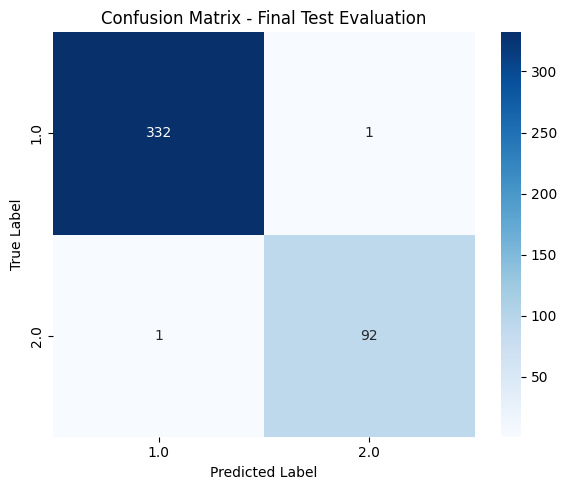

In [7]:
# Create confusion matrix
test_conf_matrix = confusion_matrix(y_test_encoded, y_test_pred)
print(f"Test set confusion matrix:\n{test_conf_matrix}")

# Create heatmap to visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Final Test Evaluation')
plt.tight_layout()

# Save confusion matrix as PNG
plt.savefig('../Outputs/final_eval_confusion_matrix.png', dpi=300)

plt.show()